**1. Introduction**

Dataset Problem

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

---



Objectives of Notebook 📌


*   Explore and preprocess the data set for regression models.
*   Build a couple of regression models with different
experiments.

---




**Dataset Description 🧾**

👉 There are 21 variables in this data set:

2 categorical variables,

17 continuous variables,

1 variable to store house ID and

1 variable to store date house sold.

**2. Importing Libraries 📚**
👉

Importing libraries that will be used in this notebook.

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error ,accuracy_score,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pickle

from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression , Lasso, Ridge, OrthogonalMatchingPursuitCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

**3. Reading Data Set** 👓
👉

After importing libraries, we will also import the dataset that will be used.

In [84]:
df = pd.read_csv('/content/kc_house_data.csv')

In [85]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [86]:
df.shape

(21613, 21)

**4. Checking Null Values**

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [88]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [89]:
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

👉 There are no missing values detected from the dataset 😊.

5. **Data Exploration**🔍
👉

 This section will perform data exploration of the data set.

5.1 Heatmap

<ipython-input-90-354fbd9ce1da>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


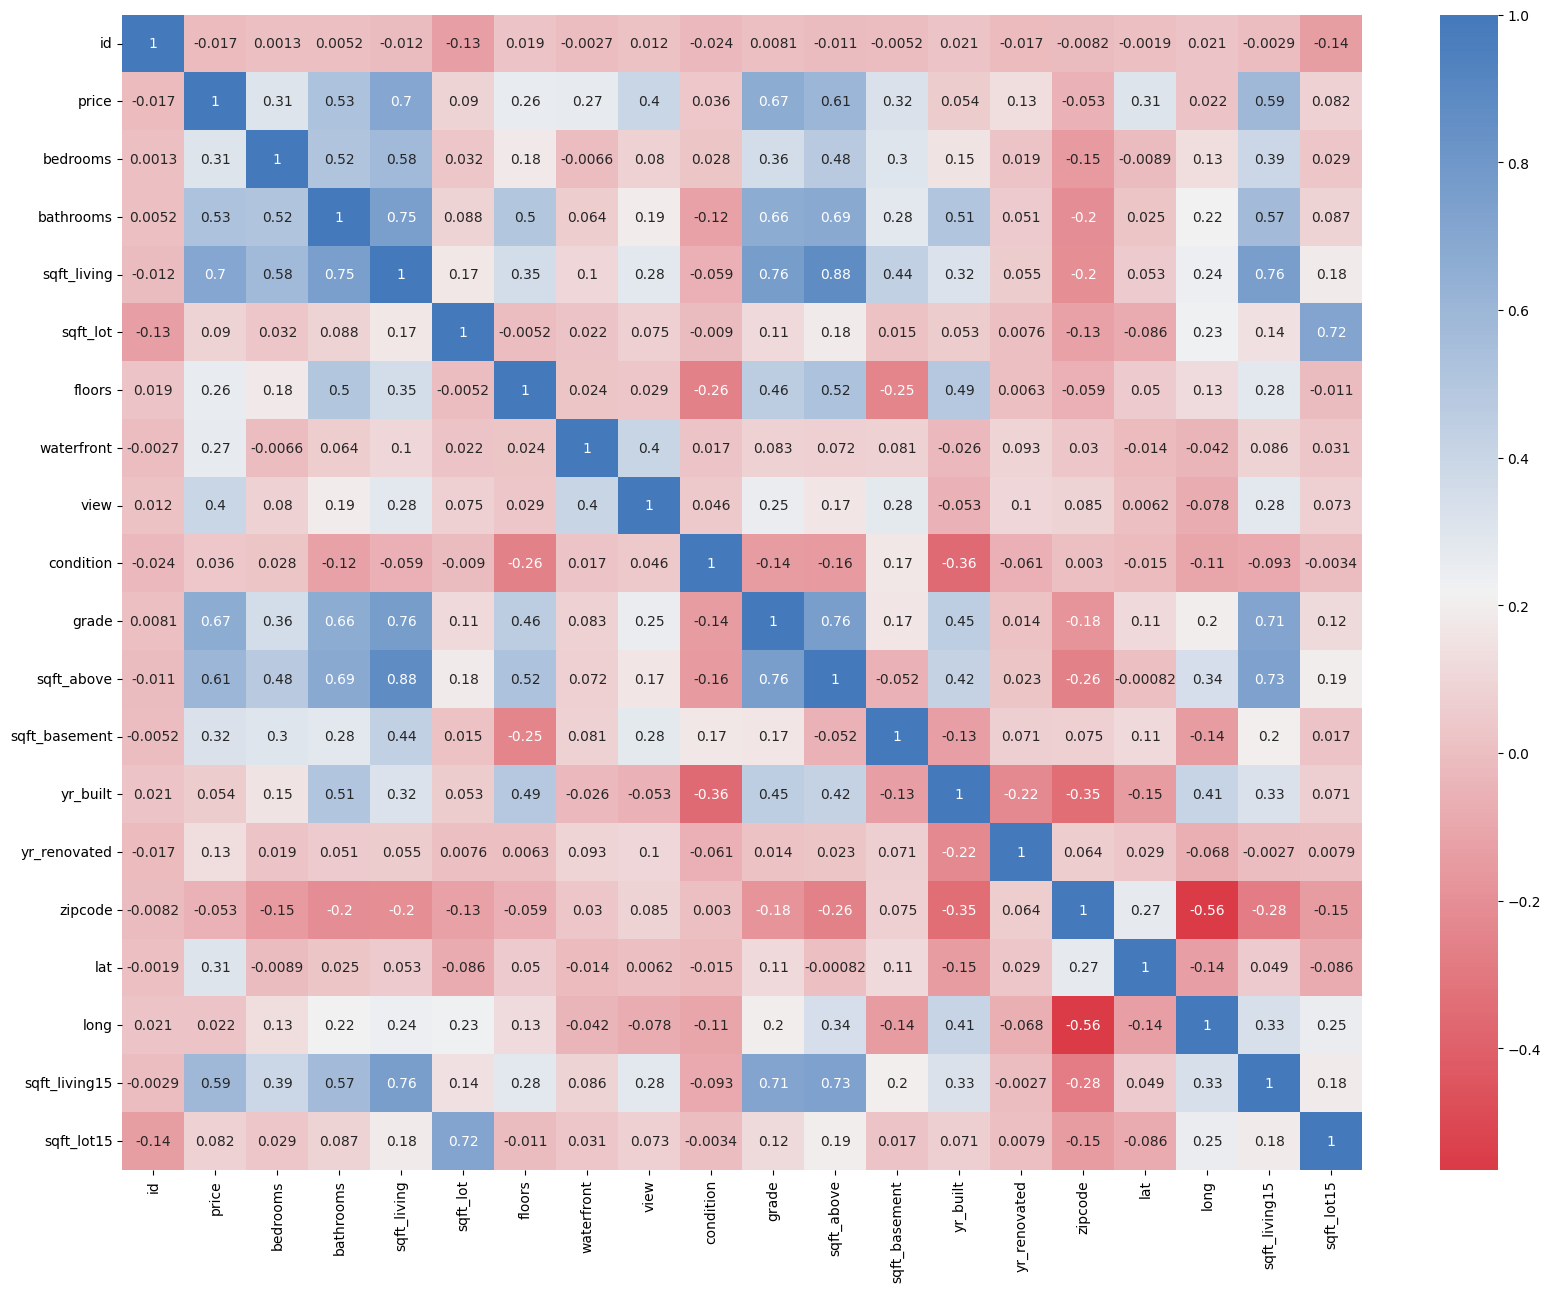

In [90]:
plt.figure(figsize=(20,15))
corr = df.corr()
sns.heatmap(corr, annot = True, cmap=sns.diverging_palette(10, 250, as_cmap=True));

5.2 Describing Dataset

In [91]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


5.3 Distribution of Dataset

In [92]:
num_col=[]
for col in df.columns:
  if df[col].dtype != 'object':
    num_col.append(col)

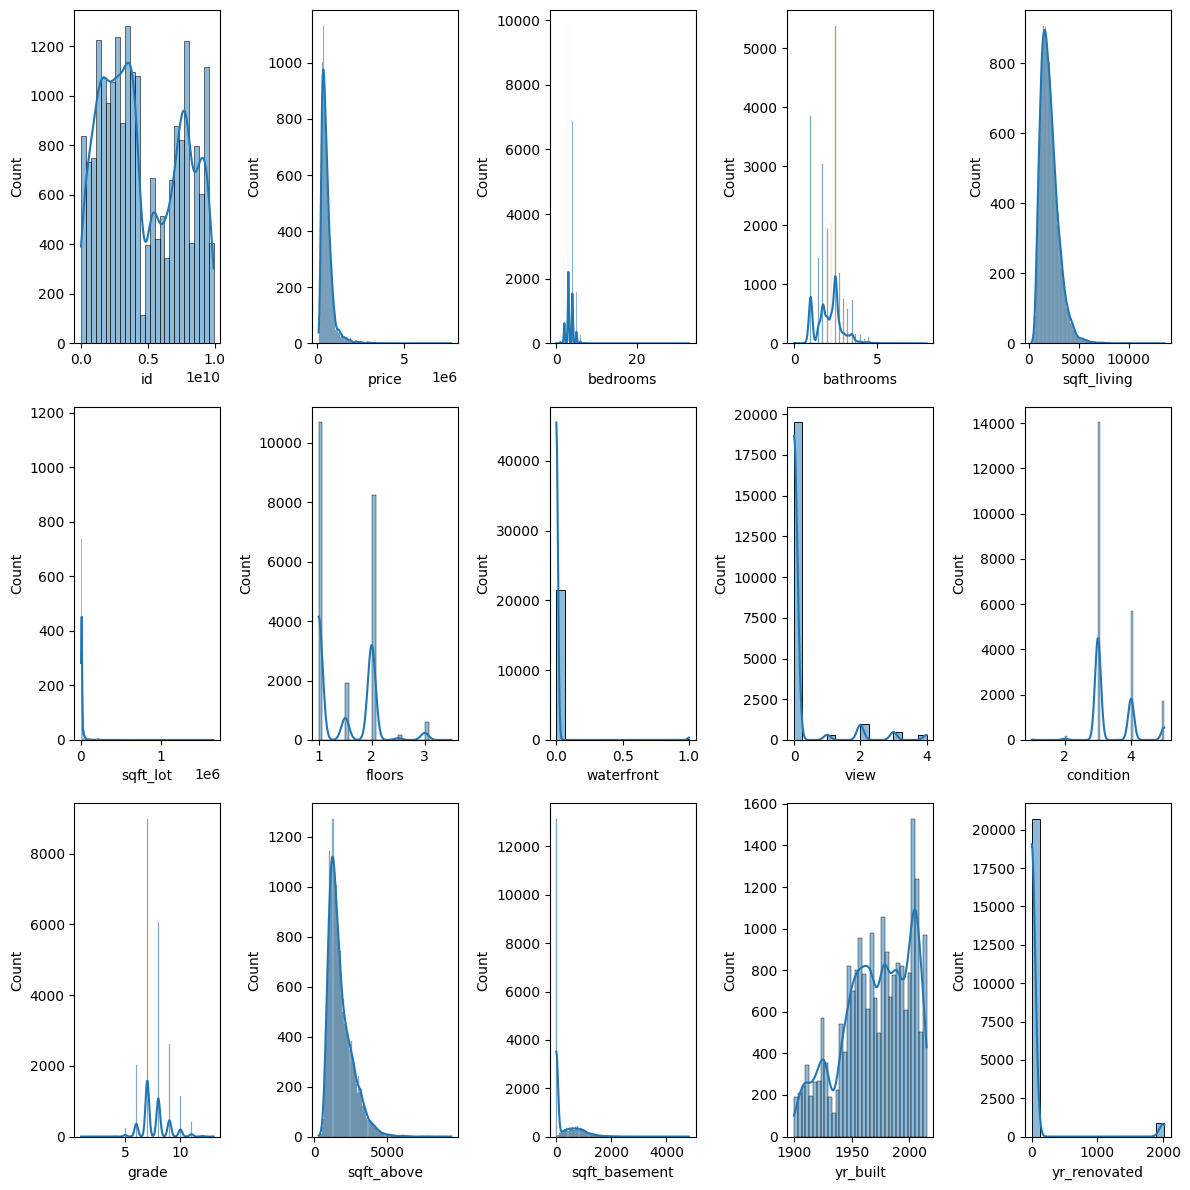

In [93]:
f, axes = plt.subplots(3, 5, figsize=(12, 12))

axes = axes.flatten()


for col, ax in zip(num_col, axes):
    sns.histplot(data=df, x=col, kde=True, ax=ax)

for i in range(len(num_col), len(axes)):
    f.delaxes(axes[i])

plt.tight_layout()
plt.show()

6. **Data Preprocessing**

6.1 Dropping Columns & Set Target 🔻
👉

This section will drop id column since it is unique.

In [94]:
df.drop(columns=['id'], inplace =True)

y = df['price']
df.drop(columns=['price'], inplace=True)

In [95]:
df.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


6.2 Some feature engineering 🔨
👉


In [96]:
df['date'] = pd.to_datetime(df['date'])
df['bathrooms'] = df['bathrooms'].astype(int)
df['floors'] = df['floors'].astype(int)

y = y.astype(int)



In [97]:
df.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [98]:
df['house_age'] = df['date'].dt.year - df['yr_built']
df['renovated'] = df['yr_renovated'].apply(lambda yr: 0 if yr == 0 else 1)

df.drop(columns= ['date', 'yr_built', 'yr_renovated'], inplace=True)

In [99]:
y = np.log(y)
df['sqft_living'] = np.log(df['sqft_living'])

6.3 Splitting Dataset 🪓
👉

The dataset will be split into 80% train and 20% test.

In [100]:
X_train, X_test, y_train, y_test = train_test_split(df, y, random_state=42, test_size=0.2, shuffle=True)
print ("train size={}, test_size={}, total_size={}".format(X_train.shape[0], X_test.shape[0], df.shape[0]))

train size=17290, test_size=4323, total_size=21613


7. **Models** 🛠
👉

This step will develop multiple regression models with different experiments.

In [101]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'XGBoost Regressor': XGBRegressor(),
    'DecisionTree Regressor': DecisionTreeRegressor(),
    'KNeighborRegressor': KNeighborsRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'OrthogonalMatchingPursuitCV': OrthogonalMatchingPursuitCV(),
    'RandomForestRegressor': RandomForestRegressor()

}


In [102]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
  np.random.seed(42)

  model_test_scores={}
  model_train_scores={}
  r2_train_scores={}
  r2_test_scores={}
  mse_train_scores={}
  mse_test_scores={}

  for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    model_test_scores[name]= model.score(X_test, y_test)
    model_train_scores[name]= model.score(X_train, y_train)

    r2_test_scores[name]= r2_score(y_pred, y_test)
    r2_train_scores[name]= r2_score(y_pred_train, y_train)

    mse_test_scores[name]= mean_squared_error(y_pred, y_test)
    mse_train_scores[name]= mean_squared_error(y_pred_train, y_train)

  return (model_test_scores,
         model_train_scores,
         r2_test_scores,
         r2_train_scores,
         mse_test_scores,
         mse_train_scores)

7.1 **Normalization**

In [103]:
scale = StandardScaler()

X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.transform(X_test)


In [104]:
(test_score,
 train_score,
 r2_test,
 r2_train,
 mse_test,
 mse_train) = fit_and_score(models, X_train_scale, X_test_scale, y_train, y_test)

In [105]:
score = pd.DataFrame({
    "Test Score": test_score,
    "Test r2": r2_test,
    "Test mse": mse_test,
    "Train Score": train_score,
    "Train r2": r2_train,
    "Train mse": mse_train,

}, index=train_score.keys()).sort_values(by='Test r2')

In [106]:
 score

,Test Score,Test r2,Test mse,Train Score,Train r2,Train mse
Lasso,-0.000617,-9.038596e+28,0.285208,0.000000,-2.182231e+28,0.275436
OrthogonalMatchingPursuitCV,0.752765,6.691811e-01,0.070470,0.746445,6.603164e-01,0.069838
Ridge,0.775401,7.144806e-01,0.064018,0.770629,7.023414e-01,0.063177
Linear Regression,0.775403,7.144971e-01,0.064017,0.770629,7.023593e-01,0.063177
DecisionTree Regressor,0.782503,7.878726e-01,0.061994,0.999505,9.995045e-01,0.000136
KNeighborRegressor,0.828246,7.914076e-01,0.048955,0.887163,8.667223e-01,0.031079
GradientBoosting,0.878908,8.576216e-01,0.034515,0.885202,8.626690e-01,0.031620
RandomForestRegressor,0.889449,8.753366e-01,0.031511,0.983493,9.822053e-01,0.004547
XGBoost Regressor,0.900961,8.936075e-01,0.028229,0.951445,9.477948e-01,0.013374


In [107]:
xgb = XGBRegressor()

xgb.fit(X_train_scale, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

8. **Model Evaluation**

In [108]:
y_train_pred = xgb.predict(X_train_scale)
y_pred = xgb.predict(X_test_scale)

In [114]:
print("The r2 score for training set is: ",r2_score(y_train_pred, y_train))

The r2 score for training set is:  0.9477948266982972


In [115]:
print("The r2 score for test set is: ",r2_score(y_pred, y_test))

The r2 score for test set is:  0.8936074554683102


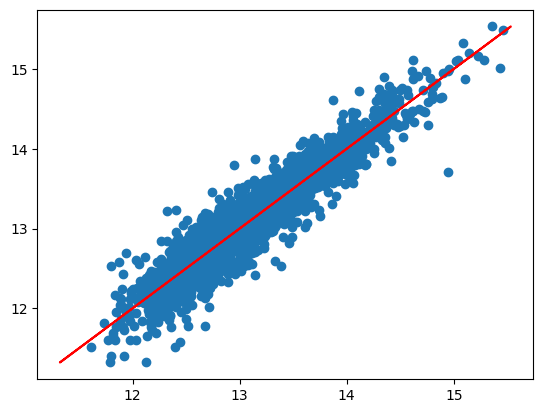

In [111]:
#plt.figure(figsize=(12,6))
plt.scatter(y=y_test, x=y_pred)
plt.plot(y_test, y_test, 'r')

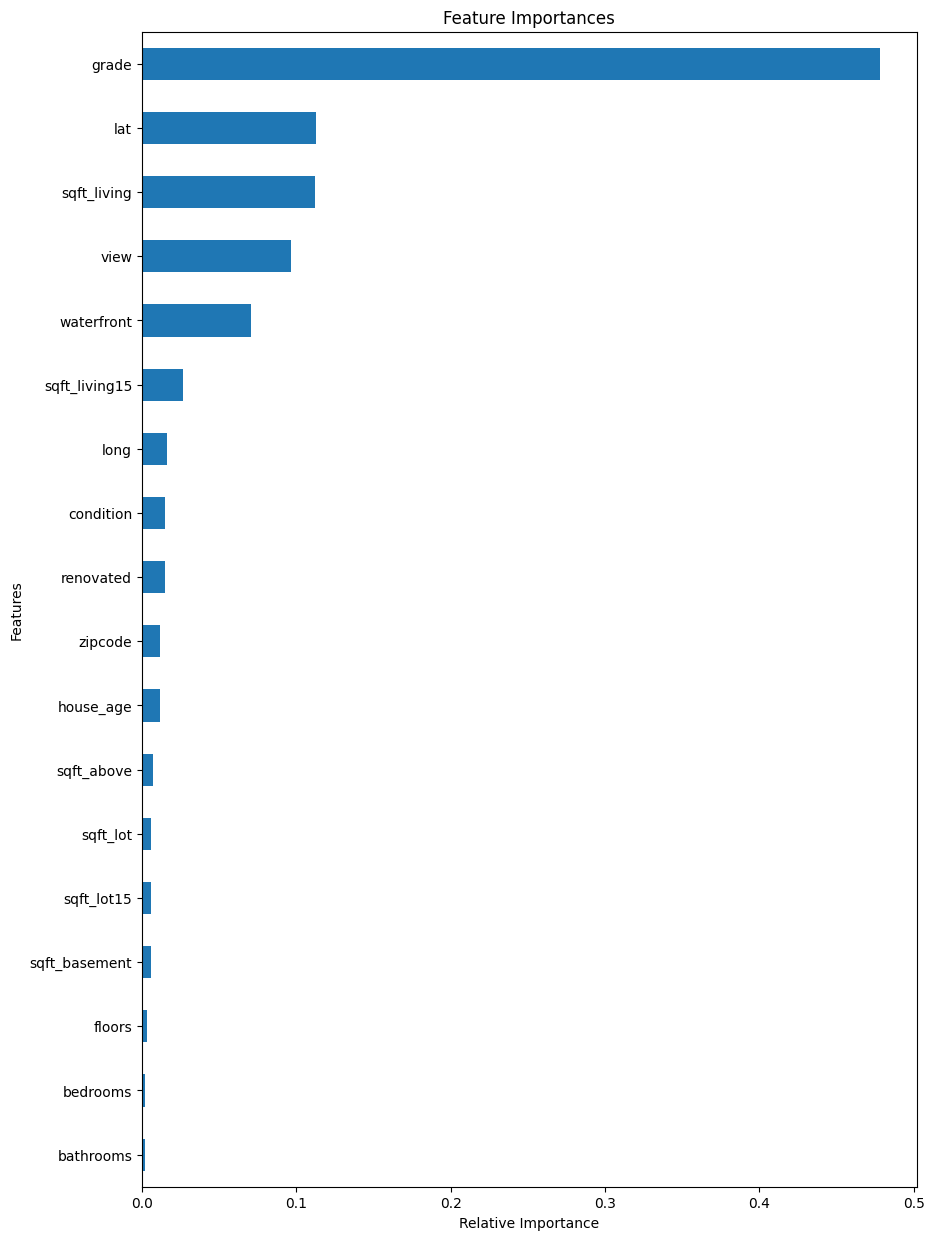

In [113]:
plt.figure(figsize=(10,15))
plt.title('Feature Importances')
feat_importances = pd.Series(xgb.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind='barh')

plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

9. **Saving Model**

In [124]:
with open('model.pkl' , 'wb') as f:
  pickle.dump(xgb, f)

10. **Conclusion**

The best model was XGBRegressor with r2 score of 89.36%.